Team Members: Erika Dickson, Drashti Mehta, Dulce Funez Chinchilla

(21000, 21)
       Gender      Male  Animal  Friends  Family  Dead&Imaginary  \
5048      1.0  0.000000     0.0     0.00    0.00             0.0   
7085      1.0  0.000000     0.0     0.00    0.00             0.0   
17910     1.0  0.000000     0.0     0.00    0.00             0.0   
6224      0.0  0.000000     0.0     0.00    0.00             0.0   
20394     0.0  0.000000     0.0     0.00    0.00             0.0   
...       ...       ...     ...      ...     ...             ...   
769       1.0  0.000000     0.0     0.50    0.50             0.0   
16023     0.0  0.000000     0.0     0.00    0.25             0.0   
16850     1.0  0.500000     0.0     0.25    0.25             0.0   
11284     1.0  0.333333     0.0     0.00    0.50             0.0   
5390      0.0  0.000000     0.0     0.20    0.00             0.0   

       Aggression/Friendliness  A/CIndex  F/CIndex  S/CIndex  
5048                  0.000000       0.0      0.00       0.0  
7085                  0.000000       0.0     

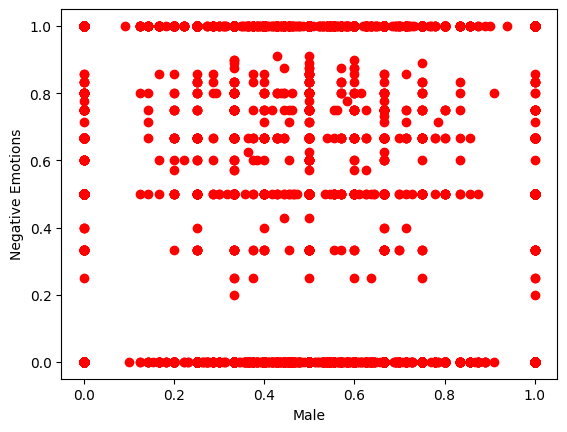

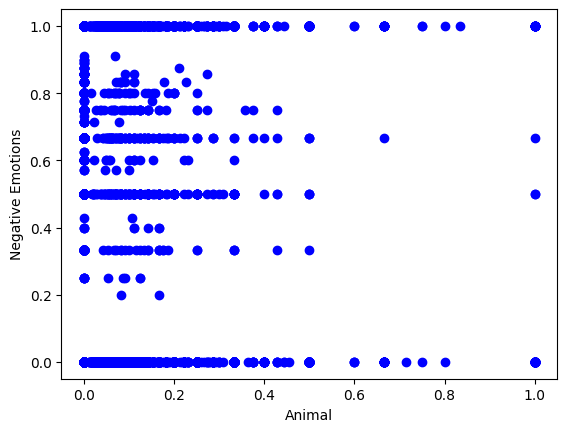

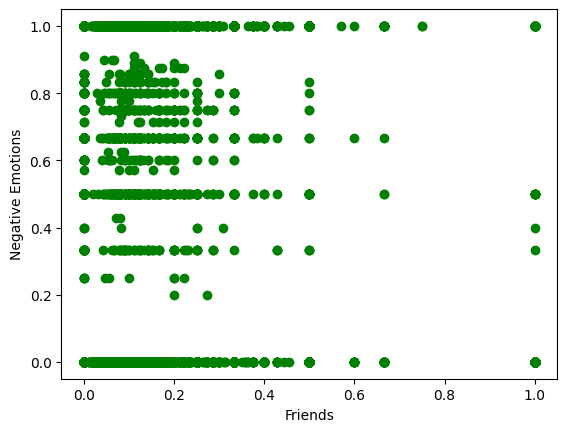

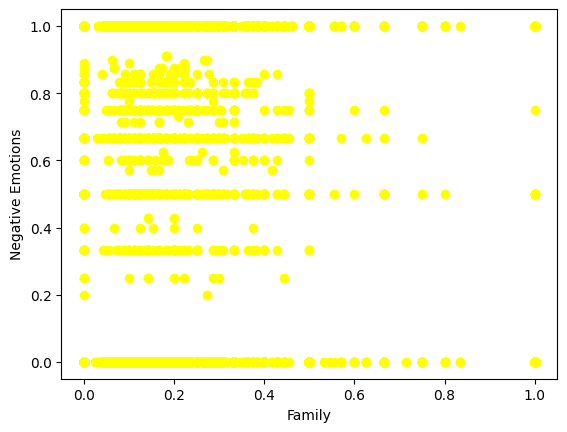

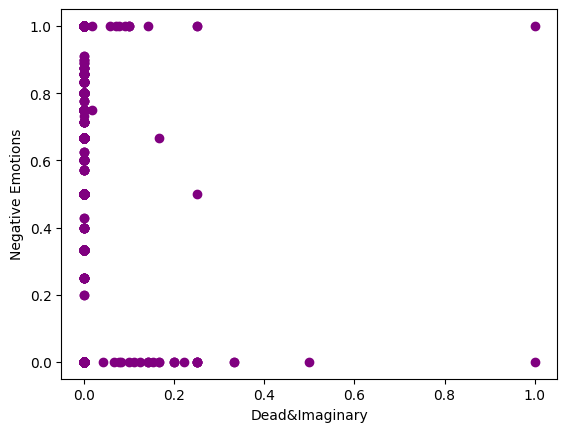

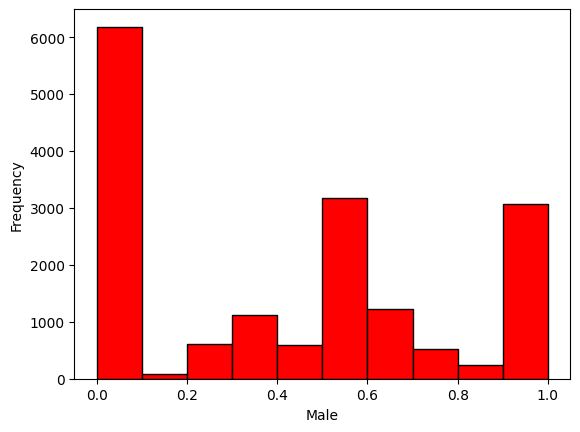

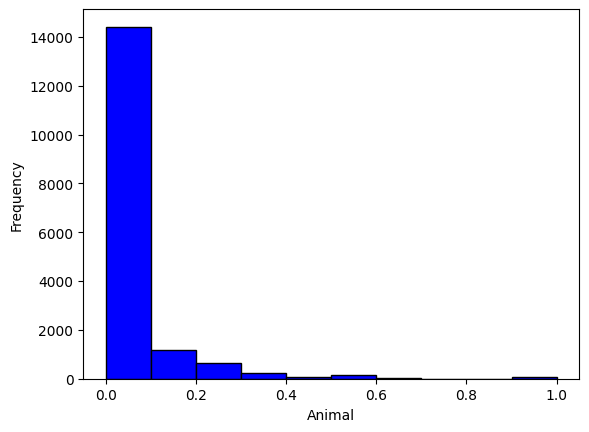

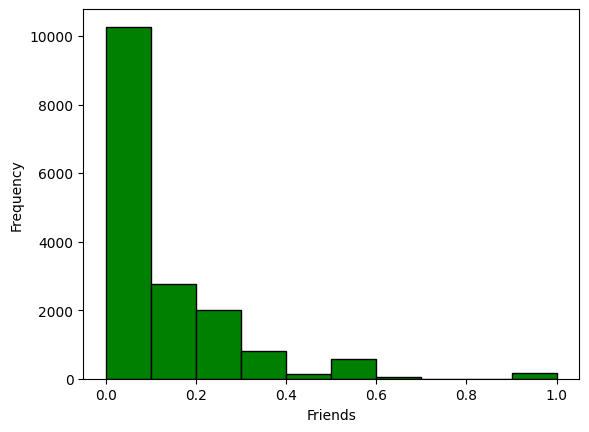

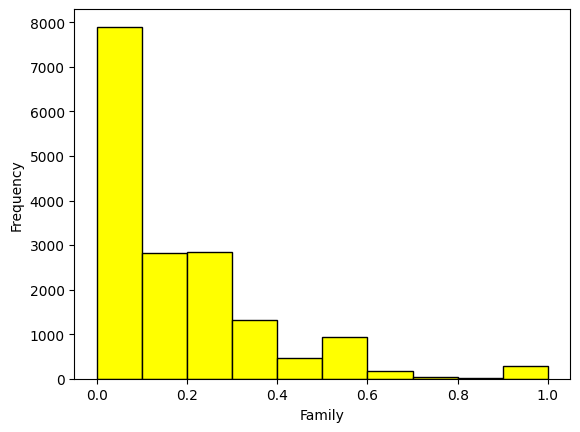

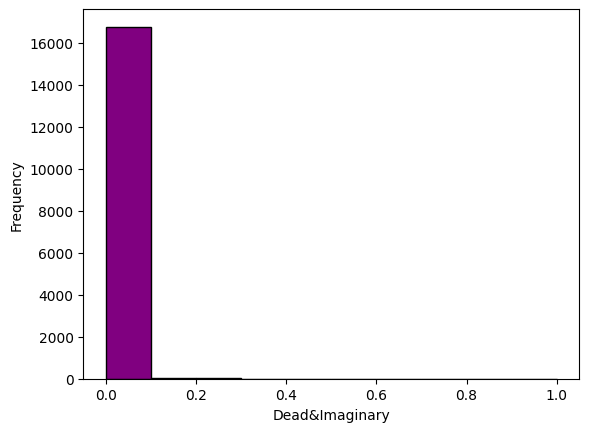

                           Gender      Male    Animal   Friends    Family  \
Gender                   1.000000 -0.022155 -0.017792 -0.105458  0.065204   
Male                    -0.022155  1.000000 -0.060983  0.231913  0.021379   
Animal                  -0.017792 -0.060983  1.000000 -0.013409 -0.019689   
Friends                 -0.105458  0.231913 -0.013409  1.000000 -0.128700   
Family                   0.065204  0.021379 -0.019689 -0.128700  1.000000   
Dead&Imaginary           0.006167 -0.015574 -0.005299 -0.011449 -0.008404   
Aggression/Friendliness -0.044520  0.024619  0.025333  0.001307 -0.022361   
A/CIndex                -0.027230 -0.052908  0.041126  0.039099 -0.008116   
F/CIndex                 0.096935 -0.012476 -0.036839  0.043381  0.025066   
S/CIndex                 0.015367  0.002929 -0.008512  0.045905 -0.001644   
NegativeEmotions         0.063773  0.017313 -0.004686  0.007380  0.025711   

                         Dead&Imaginary  Aggression/Friendliness  A/CIndex 

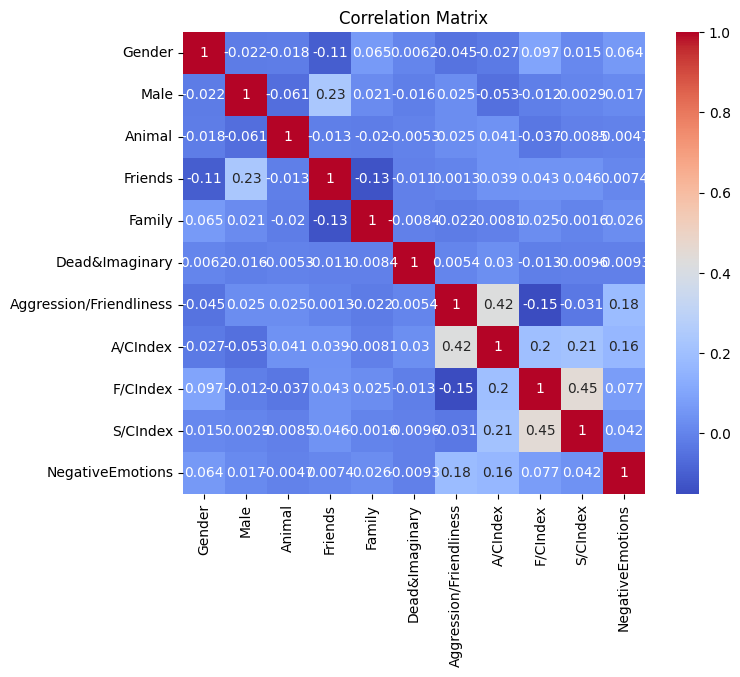

Index(['Gender', 'Male', 'Animal', 'Friends', 'Family', 'Dead&Imaginary',
       'Aggression/Friendliness', 'A/CIndex', 'F/CIndex', 'S/CIndex',
       'NegativeEmotions'],
      dtype='object')


,Gender,Male,Animal,Friends,Family,Dead&Imaginary,Aggression/Friendliness,A/CIndex,F/CIndex,S/CIndex,NegativeEmotions
15345,1.0,0.500000,0.000000,0.166667,0.250000,0.0,0.833333,0.041667,0.007576,0.010417,0.0
8476,0.0,0.750000,0.055556,0.117647,0.176471,0.0,0.500000,0.022222,0.015152,0.013889,1.0
9052,1.0,0.000000,0.000000,0.250000,0.000000,0.0,0.500000,0.050000,0.045455,0.000000,1.0
17206,0.0,0.333333,0.000000,0.176471,0.235294,0.0,0.000000,0.000000,0.000000,0.000000,0.0
16188,1.0,0.250000,0.000000,0.142857,0.000000,0.0,1.000000,0.085714,0.012987,0.017857,1.0


[NbConvertApp] Converting notebook data_preprocessing.ipynb to script
[NbConvertApp] Writing 10131 bytes to data_preprocessing.py


ModuleNotFoundError: No module named 'xgboost'

In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from data_preprocessing import *
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import xgboost as xg 
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.ensemble import HistGradientBoostingRegressor


In [ ]:
dreams_proc = pd.read_csv('training_data.csv')
print(dreams_proc.shape)
dreams_proc.head(10)


(16800, 12)


,Unnamed: 0,Gender,Male,Animal,Friends,Family,Dead&Imaginary,Aggression/Friendliness,A/CIndex,F/CIndex,S/CIndex,NegativeEmotions
0,15345,1.0,0.500000,0.000000,0.166667,0.250000,0.0,0.833333,0.041667,0.007576,0.010417,0.0
1,8476,0.0,0.750000,0.055556,0.117647,0.176471,0.0,0.500000,0.022222,0.015152,0.013889,1.0
2,9052,1.0,0.000000,0.000000,0.250000,0.000000,0.0,0.500000,0.050000,0.045455,0.000000,1.0
3,17206,0.0,0.333333,0.000000,0.176471,0.235294,0.0,0.000000,0.000000,0.000000,0.000000,0.0
4,16188,1.0,0.250000,0.000000,0.142857,0.000000,0.0,1.000000,0.085714,0.012987,0.017857,1.0
5,4475,1.0,1.000000,0.000000,0.250000,0.000000,0.0,1.000000,0.150000,0.000000,0.000000,0.0
6,11744,1.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.100000,0.000000,0.250000,1.0
7,6056,1.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0
8,3755,1.0,0.000000,0.000000,0.000000,0.200000,0.0,0.142857,0.040000,0.127273,0.125000,0.0
9,15650,1.0,0.600000,0.166667,0.200000,0.300000,0.0,0.625000,0.066667,0.022727,0.000000,1.0


In [2]:
#Use scikit learn's KNN regression function
#KNN Regression on the processed dataset w/ k = 10
knn_regressor = KNeighborsRegressor(n_neighbors=10)
knn_regressor.fit(X_train_copy, y_train_copy)
y_predict = knn_regressor.predict(X_test_copy)
mse = mean_squared_error(y_test_copy, y_predict)
print("Error:", mse)

filename = 'finalized_model_M1.model'
pickle.dump(knn_regressor, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))

result_knn = knn_regressor.score(X_train_copy, y_train_copy)
print("KNN Regressor R^2 Score:", result_knn)


Error: 0.22856842237544794
KNN Regressor R^2 Score: 0.16921116912605683


In [3]:
#Use scikit learn's linear regression function
#Linear regression on the processed dataset

linear_regression = LinearRegression() 
linear_regression.fit(X_train_copy, y_train_copy) 
#print(linear_regression.score(X_test_copy, y_test_copy))
y_predict =linear_regression.predict(X_test_copy)
mse = mean_squared_error(y_test_copy, y_predict)
print("Linear Regression MSE:", mse)

filename = 'finalized_model_LR1.model'
pickle.dump(linear_regression, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_copy, y_test_copy)

result_lr = linear_regression.score(X_train_copy, y_train_copy)
print("Linear Regression R^2 Score:", result_lr)

Linear Regression MSE: 0.21722195802117458
Linear Regression R^2 Score: 0.05444218631502651


In [4]:
#Use scikit learn's SVM function
#SVM on the processed dataset

svm_regressor = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svm_regressor.fit(X_train_copy, y_train_copy)
y_predict_svm = svm_regressor.predict(X_test_copy)
mse_svm = mean_squared_error(y_test_copy, y_predict_svm)
print("SVM MSE (processed):", mse_svm)

filename_svm = 'finalized_model_SVM1.model'
pickle.dump(svm_regressor, open(filename_svm, 'wb'))

loaded_svm_model = pickle.load(open(filename_svm, 'rb'))
result_svm = loaded_svm_model.score(X_test_copy, y_test_copy)
#print("SVM Score (processed):", result_svm)

result_svmr = svm_regressor.score(X_train_copy, y_train_copy)
print("SVM R^2 Score:", result_svmr)

SVM MSE (processed): 0.2491787183853621
SVM R^2 Score: -0.032637229241249566


In [ ]:
#Use scikit learn's random forest function
#Random forest on the processed dataset

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_copy, y_train_copy)
y_predict_rf = rf_regressor.predict(X_test_copy)
mse_rf = mean_squared_error(y_test_copy, y_predict_rf)
print("Random Forest MSE :", mse_rf)

filename_rf = 'finalized_model_RF1.model'
pickle.dump(rf_regressor, open(filename_rf, 'wb'))

loaded_rf_model = pickle.load(open(filename_rf, 'rb'))
result_rf = loaded_rf_model.score(X_test_copy, y_test_copy)
print("Random Forest Score (processed):", result_rf)

Random Forest MSE : 0.2266576040211706
Random Forest Score (processed): -0.007773943806621997


In [ ]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 10, seed = 123) 
xgb_r.fit(X_train_copy, y_train_copy) 
pred = xgb_r.predict(X_test_copy) 
rmse = np.sqrt(MSE(y_test_copy, pred)) 
print("RMSE : % f" %(rmse))

RMSE :  0.454457


In [ ]:
#Huber Loss Regressor Function
huber = HuberRegressor().fit(X_train_copy, y_train_copy)
print(f"Huber Score: {huber.score(X_train_copy, y_train_copy)}")

Huber Score: 0.051797740181457996


In [ ]:
#Polynomial Regression attempt

#poly = PolynomialFeatures(degree=4)
#X_poly = poly.fit_transform(X_train_copy)
#poly.fit(X_poly, y_train_copy)
#X_test_poly = poly.transform(X_test_copy)

#lin2 = LinearRegression()
#lin2.fit(X_poly, y_train_copy)

#print(lin2.score(X_test_copy, y_test_copy))
#y_predict = lin2.predict(X_test_poly)
#mse = mean_squared_error(y_test_copy, y_predict)
#print("Error:", mse)


In [ ]:
#Ridge Regression
rdg = Ridge(alpha = 1.0)
rdg.fit(X_train_copy, y_train_copy)
rdg.score(X_test_copy,y_test_copy)

0.034955358225312594

In [ ]:
#Elastic Net Regression
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
elastic_net.fit(X_train_copy, y_train_copy)
y_predict_elastic = elastic_net.predict(X_test_copy)
mse_elastic = mean_squared_error(y_test_copy, y_predict_elastic)
print("Elastic Net MSE:", mse_elastic)

Elastic Net MSE: 0.2249478904773281


In [ ]:
#Lasso Regression
lasso = Lasso(alpha=0.1)  # Regularization strength (higher alpha means more regularization)

lasso.fit(X_train_copy, y_train_copy)

y_pred = lasso.predict(X_test_copy)

mse = mean_squared_error(y_test_copy, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

print("\nLasso Coefficients:")
print(lasso.coef_)

non_zero_coefficients = np.where(lasso.coef_ != 0)[0]
print(f"\nSelected features (non-zero coefficients): {non_zero_coefficients}") 

Mean Squared Error: 0.2249

Lasso Coefficients:
[ 0.  0. -0.  0.  0. -0.  0.  0.  0.  0.]

Selected features (non-zero coefficients): []


In [ ]:
est = HistGradientBoostingRegressor(loss = 'squared_error', learning_rate=0.1, max_iter=100,
                                    max_bins=255, early_stopping='auto', scoring='loss', n_iter_no_change=100).fit(X_train_copy, y_train_copy)
score = est.score(X_train_copy, y_train_copy)
print(score)

0.2122638140968479
